In [1]:
%matplotlib inline

# Data Exploration

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


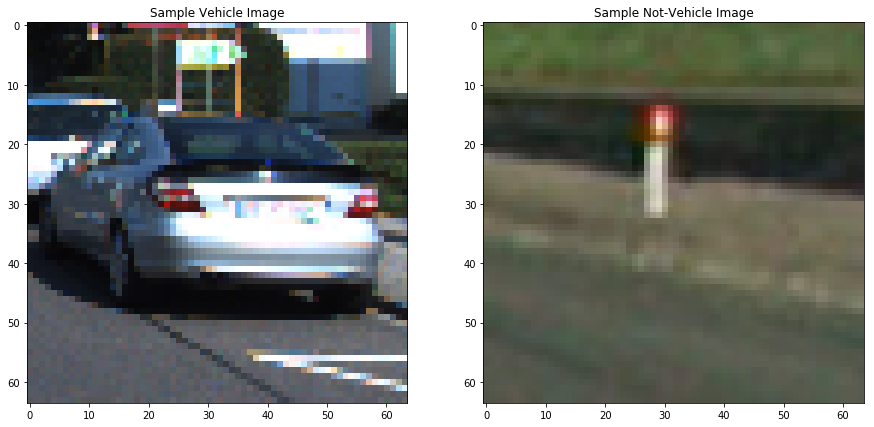

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from utilities import get_training_data
#from skimage.feature import hog
#from skimage import color, exposure
# images are divided up into vehicles and non-vehicles

cars, notcars = get_training_data()
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure(figsize=(15, 9))
plt.subplot(121)
plt.imshow(car_image)
plt.title('Sample Vehicle Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Sample Non-Vehicle Image');


## Visualize HOG features

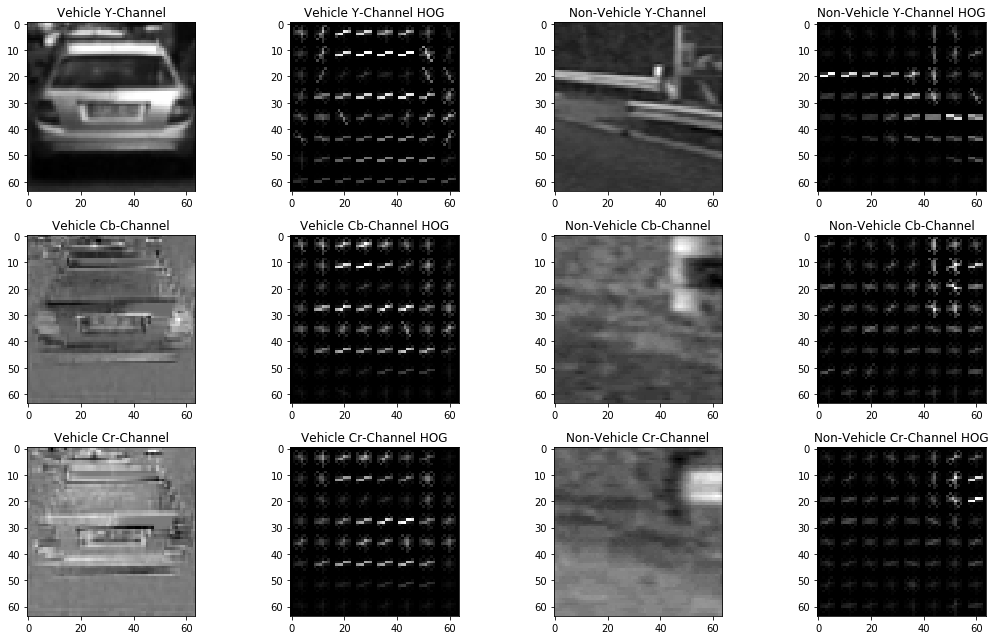

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from classifier import get_hog_features
from utilities import get_training_data

# Read in our vehicles and non-vehicles
cars, notcars = get_training_data()

# Generate a random index to look at a car and noncar image
idx = np.random.randint(0, len(cars))

# Read in the images
car_image = mpimg.imread(cars[idx])
car_image = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
car_y_channel = car_image[:,:,0]
car_cb_channel = car_image[:,:,1]
car_cr_channel = car_image[:,:,2]

non_car_image = mpimg.imread(notcars[idx])
non_car_image = cv2.cvtColor(non_car_image, cv2.COLOR_RGB2YCrCb)
non_car_y_channel = non_car_image[:,:,0]
non_car_cb_channel = non_car_image[:,:,1]
non_car_cr_channel = non_car_image[:,:,2]

# HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
_, car_hog_image_y = get_hog_features(car_y_channel, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, car_hog_image_cb = get_hog_features(car_cb_channel, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, car_hog_image_cr = get_hog_features(car_cr_channel, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

_, non_car_hog_image_y = get_hog_features(non_car_y_channel, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, non_car_hog_image_cb = get_hog_features(non_car_cb_channel, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
_, non_car_hog_image_cr = get_hog_features(non_car_cr_channel, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

# Plot the examples
fig, ax = plt.subplots(3, 4, figsize=(15, 9))
ax[0, 0].imshow(car_y_channel, cmap='gray')
ax[0, 0].set_title('Vehicle Y-Channel')
ax[0, 1].imshow(car_hog_image_y, cmap='gray')
ax[0, 1].set_title('Vehicle Y-Channel HOG');
ax[0, 2].imshow(non_car_y_channel, cmap='gray')
ax[0, 2].set_title('Non-Vehicle Y-Channel')
ax[0, 3].imshow(non_car_hog_image_y, cmap='gray')
ax[0, 3].set_title('Non-Vehicle Y-Channel HOG');
ax[1, 0].imshow(car_cb_channel, cmap='gray')
ax[1, 0].set_title('Vehicle Cb-Channel')
ax[1, 1].imshow(car_hog_image_cb, cmap='gray')
ax[1, 1].set_title('Vehicle Cb-Channel HOG');
ax[1, 2].imshow(non_car_cb_channel, cmap='gray')
ax[1, 2].set_title('Non-Vehicle Cb-Channel')
ax[1, 3].imshow(non_car_hog_image_cb, cmap='gray')
ax[1, 3].set_title('Non-Vehicle Cb-Channel');
ax[2, 0].imshow(car_cr_channel, cmap='gray')
ax[2, 0].set_title('Vehicle Cr-Channel')
ax[2, 1].imshow(car_hog_image_cr, cmap='gray')
ax[2, 1].set_title('Vehicle Cr-Channel HOG');
ax[2, 2].imshow(non_car_cr_channel, cmap='gray')
ax[2, 2].set_title('Non-Vehicle Cr-Channel')
ax[2, 3].imshow(non_car_hog_image_cr, cmap='gray')
ax[2, 3].set_title('Non-Vehicle Cr-Channel HOG');
fig.tight_layout()
